In [1]:
import cv2
import os 
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
imagePath = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\beckhamtrumpkim\\'

cascPath = 'C:\\Users\\Jonathan\\AppData\\Local\\Programs\\Python\\Python37\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml'
detector = cv2.CascadeClassifier(cascPath)


#recognizer = cv2.face.createLBPHFaceRecognizer
#cv2.face.LBPHFaceRecognizer_create() change to createLBPHFaceRecognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

cv2.__version__

'4.1.1'

In [30]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR2')] #Check color space

In [32]:
len(flags)
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12']


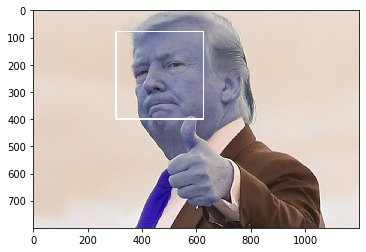

In [3]:
imgloc = imagePath+'1.2.JPG'
img1 = cv2.imread(imgloc)
faces = detector.detectMultiScale(img1) #OpenCV by default reads images in BGR format
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 255, 255), 3)

#plt.figure(figsize=(12,8))
#plt.imshow(gray, cmap='gray')
plt.imshow(img1)
plt.show()


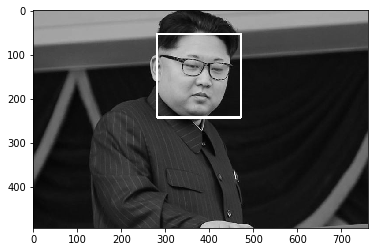

In [4]:
imgloc = imagePath+'2.2.JPG'
gray = cv2.imread(imgloc)
grayimage2 = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)  #Change BGR to GRAY #change to ; full color = cv2.COLOR_BGR2RGB
faces = detector.detectMultiScale(grayimage2,scaleFactor=1.1, minNeighbors = 5)

for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(grayimage2, (x, y), (x+w, y+h), (255, 255, 255), 3)

#plt.figure(figsize=(12,8))
plt.imshow(grayimage2 , cmap='gray')
plt.show()

[[111 123  58  58]
 [117  39  78  78]]


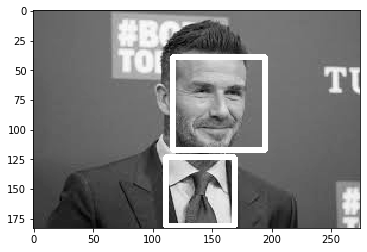

In [58]:
#pic with 2 faces identified

imgloc = imagePath+'0.3.JPG'
gray = cv2.imread(imgloc)
grayimage2 = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(gray,scaleFactor=1.2, minNeighbors = 5)
print(faces)
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(grayimage2, (x, y), (x+w, y+h), (255, 255, 255), 3)

#plt.figure(figsize=(12,8))
plt.imshow(grayimage2, cmap='gray')
plt.show()

0
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\0.0.jpg
0
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\0.1.jpg
0
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\0.2.jpg
0
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\0.3.jpg
0
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\0.4.jpg
0
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\0.5.jpg
1
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\1.0.jpg
1
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\1.1.jpg
1
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\1.2.jpg
1
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\1.3.jpg
1
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\1.4.jpg
1
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\1.5.jpg
2
C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\2.0.jpg
2
C:\Users\Jonathan\data 

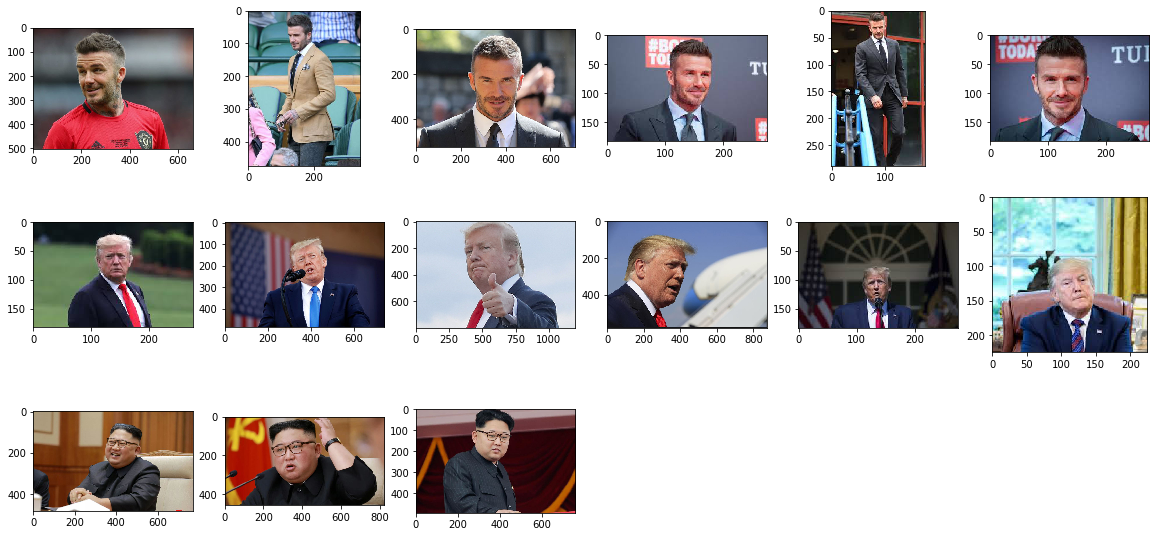

In [8]:

imagePath = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\beckhamtrumpkim\\'

imagefulllist = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5'
                , '2.0', '2.1', '2.2']

plt.figure(figsize=(20, 20))
for count, item in enumerate(imagefulllist): 
    id = item.split(".")[0]
    print(id)
    plt.subplot(6,6,count+1)
    filename = imagePath + item + '.jpg'
    image = imread(filename)
    print(filename)
    plt.imshow(image)

In [64]:
path = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\beckhamtrumpkim'

def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)] 
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') #Luminance  ==> greystyle
        img_numpy = np.array(PIL_img,'uint8')
        print(PIL_img)
        #.show()
        #print(len(img_numpy)
        id = int(os.path.split(imagePath)[-1].split(".")[0])
        faces = detector.detectMultiScale(img_numpy)
        print(id)
        print(faces)
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
            #print(ids)
            
    return faceSamples,ids
faces,ids = getImagesAndLabels(path)


print("{0} faces, {0} id in total are detected".format(len(faces), len(ids)))

<PIL.Image.Image image mode=L size=662x502 at 0x21D3F50278>
0
[[132  98 207 207]]
<PIL.Image.Image image mode=L size=343x475 at 0x21D3F506D8>
0
[[104  49  72  72]]
<PIL.Image.Image image mode=L size=711x526 at 0x21D0AEBC50>
0
[[234 135 243 243]]
<PIL.Image.Image image mode=L size=275x183 at 0x21D3F507F0>
0
[[116  38  79  79]
 [110 122  60  60]]
<PIL.Image.Image image mode=L size=174x289 at 0x21D3F506D8>
0
[[71 21 32 32]]
<PIL.Image.Image image mode=L size=275x183 at 0x21D3F507F0>
0
[[ 68  36 110 110]]
<PIL.Image.Image image mode=L size=276x183 at 0x21D3F506D8>
1
[[111  35  63  63]]
<PIL.Image.Image image mode=L size=739x484 at 0x21D3F507F0>
1
[[332  93 159 159]]
<PIL.Image.Image image mode=L size=1200x800 at 0x21D3F506D8>
1
[[305  78 324 324]]
<PIL.Image.Image image mode=L size=872x582 at 0x21D3F50748>
1
[[188 139 278 278]]
<PIL.Image.Image image mode=L size=275x183 at 0x21D3F506D8>
1
[[110  86  50  50]]
<PIL.Image.Image image mode=L size=225x225 at 0x21D3F50748>
1
[[91 99 62 62]]
<PIL

In [65]:
face_recognizer=cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces, np.array(ids))

In [66]:
def train_classifier(faces, faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create() #LBPHFaceRecognizer_create no such module
    face_recognizer.train(faces, np.array(faceID))
    return face_recognizer

# Save the model as trainer.yml
facerecognizer = train_classifier(faces, ids)
facerecognizer.save('C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\bdktrainer.yml') # recognizer.save() worked on Mac, but not on Pi

#facerecognizer = train_classifier(faces, faceid)
#xmlp = "C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\trainingdata.yml"
#fs = cv2.FileStorage(xmlp, cv2.FILE_STORAGE_WRITE)

In [69]:
print("{0} faces, {0} id in total are detected".format(len(faces), len(ids)))

16 faces, 16 id in total are detected


In [70]:
imgloc = imagePath+"prediction\\"+'2.7.JPG'
print(imgloc)
gray = cv2.imread(imgloc)
testface, testimage2 = facedetection(gray)

print(testface)
print(testimage2)

C:\Users\Jonathan\data analytics\computer vision\beckhamtrumpkim\prediction\2.7.JPG
()
None


number of faces = 2 


<Figure size 432x288 with 0 Axes>

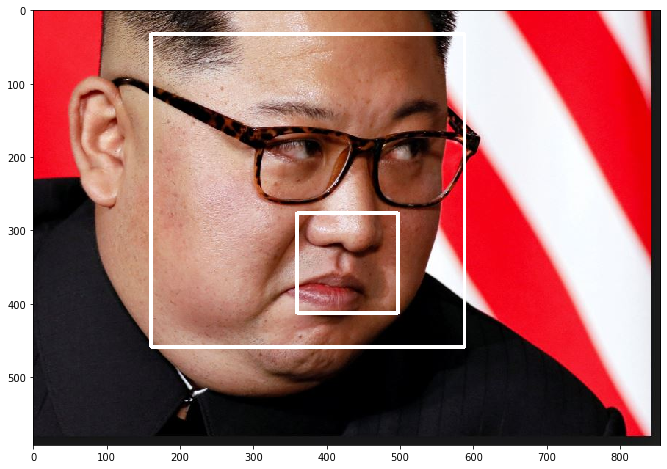

In [30]:
#using a function to replace detectMultiScale

def facedetection(test_img):
    #grayimage2 = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    
    # using these parameters more accurate
    faces = detector.detectMultiScale(test_img,scaleFactor=1.1, minNeighbors = 5)
#    faces = detector.detectMultiScale(
#        grayimage2,
#       scaleFactor= 1.16,
#        minNeighbors=35,
#        minSize=(25, 25),
#        flags=cv2.CASCADE_SCALE_IMAGE
#    )
    
    return(faces,test_img)


imgloc = "C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\"+'2.7.JPG'
#print(imgloc)
gray = cv2.imread(imgloc)
testface, testimage2 = facedetection(gray)
#print(testface)
#print(testimage2)
print('number of faces = {0} '.format(len(testface)))

for (x, y, w, h) in testface: 
    # Draw rectangle around the face
    cv2.rectangle(testimage2, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.clf()
plt.figure(figsize=(12,8))
testimage3 = cv2.cvtColor(testimage2,cv2.COLOR_BGR2RGB)
plt.imshow(testimage3)
plt.show()

In [16]:
for i in range(len(ids)):
    print(faces[i].size)

#faces is "list", element in faces is "array"

42849
5184
59049
6241
3600
1024
12100
3969
25281
104976
77284
2500
3844
22500
65536
36481


In [20]:

recognizer.train(faces, np.array(ids))
# Print the numer of faces trained and end program
print(" Total {0} faces trained.".format(len(np.unique(ids))))


 Total 3 faces trained.


In [ ]:
def puttext(test_image, text, x, y):
    cv2.putText(test_image, text, (x,y),cv2.FONT_HERSHEY_DUPLEX,2,(255,0,0),4)  #other font can check from "https://www.life2coding.com/draw-write-different-style-texts-opencv-images/"
    

In [73]:
name = {0:"Beckham", 1:"Trump", 2:"Kim"}
imgloc = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\beckham4.JPG'
gray = cv2.imread(imgloc)
faces = detector.detectMultiScale(gray,scaleFactor=1.2, minNeighbors = 2)

for face in faces:
    (x,y,w,h) = face
    print(x,y,w,h)
    grayface = gray[y:y+h, x:x+h]

126 41 71 71


confidence: 114.83490304237621
label: Beckham


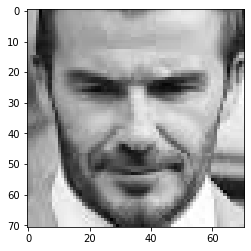

In [79]:

#testface, testimage = facedetection(gray)
grayface2 = cv2.cvtColor(grayface,cv2.COLOR_BGR2GRAY)
label, confidence = face_recognizer.predict(grayface2)


print("confidence:", confidence)
print("label:", name[label])

plt.imshow(grayface2, cmap='gray')
plt.show()

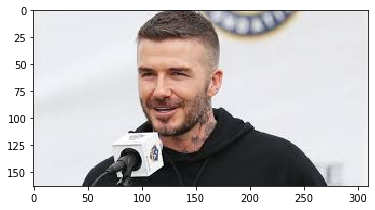

number of faces = 1 


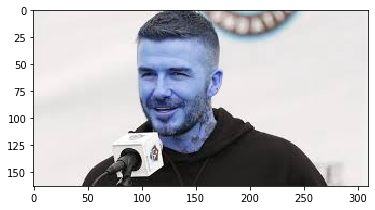

[[81 31 77 77]]
81 31 77 77


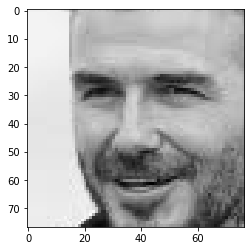

confidence: 107.29466572344991
label: 0
Beckham


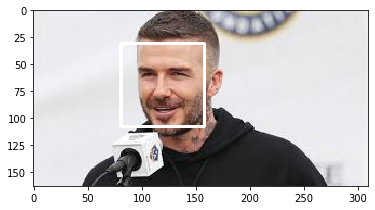

In [110]:
name = {0:"Beckham", 1:"Trump", 2:"Kim"}
imgloc = 'C:\\Users\\Jonathan\\data analytics\\computer vision\\facial_recognition xml\\prediction\\beckham5.jpg'
gray = cv2.imread(imgloc)
gray2 = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
plt.imshow(gray2)
plt.show()

grayimage2 = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(grayimage2,scaleFactor=1.2, minNeighbors = 2)

print('number of faces = {0} '.format(len(faces)))
plt.imshow(gray)
plt.show()


def put_text(test_img,text,x,y): 
    cv2.putText(test_img,text,(x,y),cv2.FONT_ITALIC,2,(255,255,255),2) #text, font size, font color( purple yellow), thickness

print(faces)

for face in faces:
    (x,y,w,h) = face
    print(x,y,w,h)
    roi_gray = grayimage2[y:y+h, x:x+h]
    plt.imshow(roi_gray, cmap='gray')
    plt.show()
    label, confidence = facerecognizer.predict(roi_gray)
    
    print("confidence:", confidence)
    print("label:", label)
    
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 2)
    predicted_name = name[label]
    print(predicted_name)
    put_text(gray, predicted_name,x,y-50) #put text 50 pixel higher than face
    
    gray = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
    
#resized_img= cv2.resize(gray,(2000,2000))
#plt.imshow(resized_img)
plt.imshow(gray)